In [40]:
import math
import numpy as np
import pandas as pd
import requests
import xlsxwriter
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf

Import data

In [41]:
df = pd.read_csv('../data/ASML.csv', index_col=False)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
1995-03-15,1995-03-15,1.875000,2.144531,1.828125,2.109375,1.342819,92646400
1995-03-16,1995-03-16,2.320313,2.390625,2.226563,2.320313,1.477101,22867200
1995-03-17,1995-03-17,2.332031,2.332031,2.226563,2.238281,1.424880,17163733
1995-03-20,1995-03-20,2.226563,2.238281,2.179688,2.226563,1.417420,7141333
1995-03-21,1995-03-21,2.226563,2.355469,2.203125,2.332031,1.484560,8198400
...,...,...,...,...,...,...,...
2021-10-19,2021-10-19,788.179993,801.619995,786.299988,800.960022,800.960022,956600
2021-10-20,2021-10-20,782.239990,785.140015,758.239990,767.700012,767.700012,1894900
2021-10-21,2021-10-21,764.530029,787.559998,763.869995,787.559998,787.559998,1083100
2021-10-22,2021-10-22,798.190002,808.799988,796.270020,800.969971,800.969971,1294600


#plot the data

Make sure to set the desired index column otherwise X axis will default to index.

Text(0, 0.5, 'Close Price USD ($)')

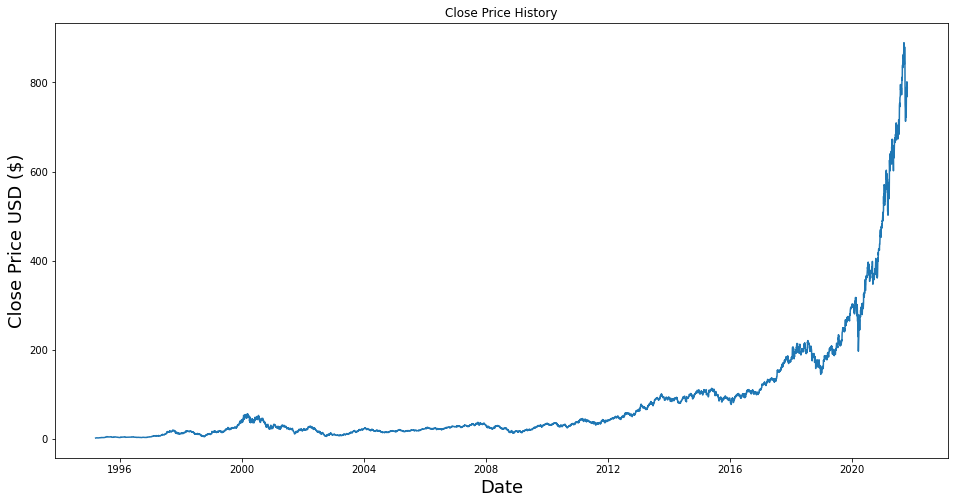

In [43]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# Voor haar eigen fonds hanteert Beth in dat verband eenvoudige vuistregels. Ze koopt geen groeiaandelen die minder dan 30% omzetgroei laten zien. Voor aandelen die een groei vertonen van meer dan 30% maar minder dan 40% betaalt ze niet meer dan 10 x sales (PS=10). Idem voor een groei tussen 40% en 55% betaalt ze maximaal 20 x sales en bij een grotere groei nooit meer dan 30 x sales. plt.show()

# Formula background
Voor haar eigen fonds hanteert Beth in dat verband eenvoudige vuistregels. Ze koopt geen groeiaandelen die minder dan 30% omzetgroei laten zien. Voor aandelen die een groei vertonen van meer dan 30% maar minder dan 40% betaalt ze niet meer dan 10 x sales (PS=10). Idem voor een groei tussen 40% en 55% betaalt ze maximaal 20 x sales en bij een grotere groei nooit meer dan 30 x sales.

In summary, 4 levels:

growth rate < 30% = NO

growth rate > 30% and stock price < (price to sales ratio * 10) = YES

growth rate > 40% and stock price < (price to sales ratio * 20) = YESS

growth rate > 55% and stock price < (price to sales ratio * 30) = YESSS


Price to sales ratio (PSR) = total market value / total sales past 12 months (dus Kindig methode kan niet worden toegepast op bedrijven die minder dan 1 jaar oud zijn?)
Growth rate = total sales + total earnings December 31st 2021 / total sales + earnings January 1st 2021

IF Growth rate > 30% & stock price < PSR * 10

Compare quarter on quarter yearly growth e.g. 2021q3 with 2020q3.

# Formula

(revenue)growth_rate = total_year_sales + total_year_earnings

    total_year_sales =
    total_year_earnings = 
    
stock price = 

price_to_sales_ratio = 
    total_market_value = 
    total_year_earnings



# ASML example October 26th 2021
Quarterly Revenue Growth (yoy)	32.40%

growth_rate = 63.90%
    
stock_price = 800.97

price_to_sales_ratio = 15.9

# Defining kindig_analysis function

In [55]:
def kindig_analysis(growth_rate, stock_price, price_to_sales_ratio):
    if growth_rate > 0.3:
        if growth_rate > 0.55 and stock_price < (price_to_sales_ratio * 30):
            print("HOPI HOPI BON")
        elif (growth_rate > 0.4 and growth_rate < 0.55) and stock_price < (price_to_sales_ratio * 20):
            print("HOPI BON")
        elif growth_rate < 0.40 and stock_price < (price_to_sales_ratio * 10):
            print("BON")
        else:
            print("Close but pas de patate")
    else:
        print("Don't buy.")

Testing the formula

In [56]:
test_growth_rate = 0.324  
test_stock_price = 800.97
test_price_to_sales_ratio = 15.9

kindig_analysis(test_growth_rate, test_stock_price, test_price_to_sales_ratio)

Close but pas de patate


# Using yfinance with ASML example
https://codingandfun.com/financial-data-from-yahoo-finance/

https://analyticsindiamag.com/hands-on-guide-to-using-yfinance-api-in-python/

In [60]:
asml = yf.Ticker('ASML')
asml_old =  asml.history(start="2010-01-01")

In [61]:
asml_old

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,24.440089,24.525344,24.212739,24.219843,497700,0.0,0
2010-01-04,24.717175,24.937418,24.567977,24.624813,1805500,0.0,0
2010-01-05,24.859260,24.958725,24.688747,24.816631,1420800,0.0,0
2010-01-06,24.809535,25.143456,24.788222,25.043991,1365200,0.0,0
2010-01-07,24.617705,24.788216,24.269575,24.347727,2672000,0.0,0
...,...,...,...,...,...,...,...
2021-10-21,764.530029,787.559998,763.869995,787.559998,1083100,0.0,0
2021-10-22,798.190002,808.799988,796.270020,800.969971,1294600,0.0,0
2021-10-25,799.690002,803.190002,787.010010,788.440002,786000,0.0,0


In [62]:
asml.info

{'zip': '5504 DR',
 'sector': 'Technology',
 'fullTimeEmployees': 29025,
 'longBusinessSummary': 'ASML Holding N.V. develops, produces, markets, sells, and services advanced semiconductor equipment systems consisting of lithography, metrology, and inspection related systems for memory and logic chipmakers. The company provides extreme ultraviolet lithography systems; and deep ultraviolet lithography systems comprising immersion and dry lithography solutions to manufacture various range of semiconductor nodes and technologies. It also offers metrology and inspection systems, including YieldStar optical metrology solutions to measure the quality of patterns on the wafers; and HMI e-beam solutions to locate and analyze individual chip defects. In addition, the company provides computational lithography and software solutions to create applications that enhance the setup of the lithography system; and mature products and services that refurbish used lithography equipment and offers associa

# Finding the right info from yfinance info

In [48]:
asml_quarterly_revenue_growth_yoy = asml.info['revenueGrowth']
asml_price_to_sales_ratio = asml.info['priceToSalesTrailing12Months']
asml_current_price = asml.info['currentPrice']

print(asml_current_price)
print(asml_price_to_sales_ratio)
print(asml_quarterly_revenue_growth_yoy)

791.23
18.509047
0.324


# Creating a dataframe and populating it

First, import the ticker list.

In [73]:
portfolio = pd.read_csv('../data/ticker_list.csv')
ticker_list = portfolio['Symbol'].to_list()

print(ticker_list)

['ATY', 'ADYEY', 'APPN', 'ASML', 'TEAM', 'BAND', 'AI', 'CRSP', 'CRWD', 'CURI', 'DDOG', 'DOCU', 'ESTC', 'ETSY', 'FSLY', 'FVRR', 'FLGT', 'LMND', 'MELI', 'MDB', 'NVDA', 'OKTA', 'PYPL', 'PINS', 'RDFN', 'SE', 'SHOP', 'SNOW', 'SQ', 'TTD', 'TWLO', 'UPST', 'WIX', 'ZM', 'ZS']


In [74]:
my_columns = ['Ticker', 'data point 1', 'data point 2', 'data point 3', 'kindig yes or no']

for i in ticker_list:
    dataframe append results three data points + formula data point

35